# Question 1:

In [1]:
import numpy as np
def csf(size, res, d):
    cycle = res/2 #since 1 cycle equals half of resolution
    theta = (cycle/60)*np.pi/ 180 # since 60 cycles equals 1 degree
    angle = np.tan(0.5*theta)
    d_opt = size/(2*angle)
    return np.round(abs(d_opt))

w = int(input('Enter width of TV(in inches): '))
h = int(input('Enter height of TV(in inches): '))
diag = np.sqrt(w**2 + h**2) # taking diagonal of TV size as it is the standard for size measurement
res1 = int(input('Enter resolution x: '))
res2 = int(input('Enter resolution y: '))
res = np.sqrt(res1**2 + res2**2)
d = int(input('Enter distance available (inches): '))
g = csf(diag, res, d)
# print (abs(g))
if g > d:
    print('Optimal Distance: {} inches'.format(d))
else:
    print('Optimal Distance: {} inches'.format(g))

Enter width of TV(in inches): 30
Enter height of TV(in inches): 40
Enter resolution x: 2000
Enter resolution y: 1920
Enter distance available (inches): 200
Optimal Distance: 122.0 inches


# Question 2:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
%matplotlib inline

<b>Read image here...comment and uncomment based on your need.</b>

In [6]:
# img = plt.imread('misc/7.1.02.tiff') #airplane
# img = plt.imread('misc/5.1.11.tiff') #airplane
# img = plt.imread('misc/7.2.01.tiff') #airplane
# img = plt.imread('misc/5.1.10.tiff') #aerial
# img = plt.imread('misc/5.2.09.tiff') #aerial
img = plt.imread('misc/7.1.08.tiff') #APC

<b>Question 2.1, 2.2, 2.3, 2.4, 2.5, 2.6</b>

Inverted image


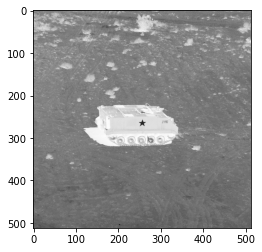

2.3) Max pixel: 215, Min pixel: 12
Bits required: 8
2.4) Image resolution: 512 X 512
2.5) Size of downloaded Image: 262278 bytes
2.6) Compression: 0.9994890917270988


In [7]:
# print('2.1) Image array (I): {}'.format(img))
# plt.title('2.2) Image: ')
# plt.imshow(img, cmap='Greys_r')
# plt.show()

inv = np.invert(img) #### inverted image
plt.imshow(inv, cmap='Greys_r')
print('Inverted image')
plt.show()
h,w = img.shape

bit_req=(int)(np.ceil(math.log((img.max()-img.min()),2)))
print('2.3) Max pixel: {}, Min pixel: {}'.format(img.max(),img.min()))
print('Bits required: {}'.format(bit_req))
print('2.4) Image resolution: {} X {}'.format(h,w))

size= os.stat('misc/5.2.09.tiff').st_size #to get downloaded file size
print('2.5) Size of downloaded Image: {} bytes'.format(size))
compress_ratio = int(h*w*bit_req/8)/size 
print('2.6) Compression: {}'.format(compress_ratio))


<b>2.7 Bit-Plane Slicing</b>

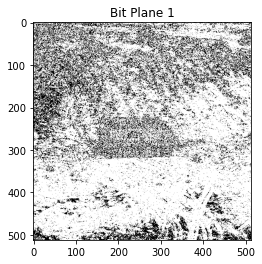

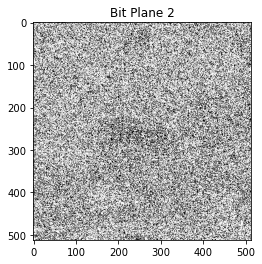

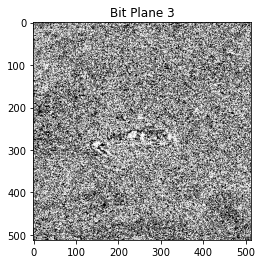

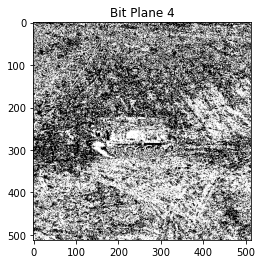

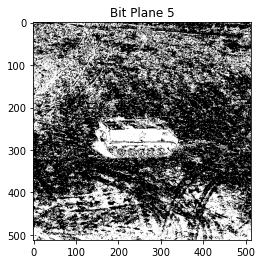

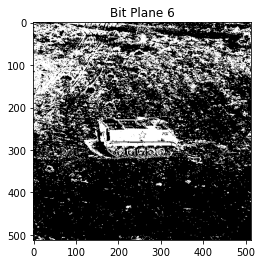

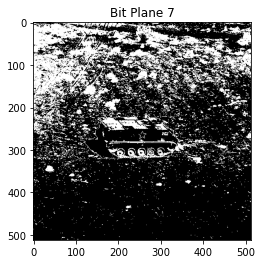

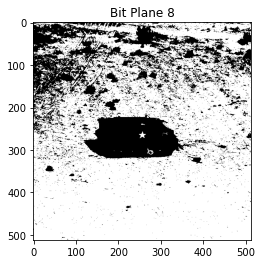

In [8]:
for k in range(0, 8):
    #create image for each k bit plane
    plane = np.full((h, w), 2**k, np.uint8)
    res= np.bitwise_and(plane, img)
    plt.imshow(res,cmap='Greys_r')
    plt.title('Bit Plane {}'.format(k+1))
    plt.show()

<b> 2.9 Image quatization bit by bit from 256 to 2 gray levels </b>

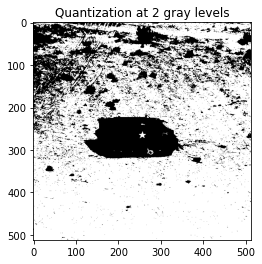

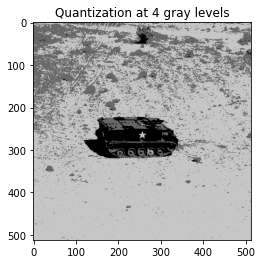

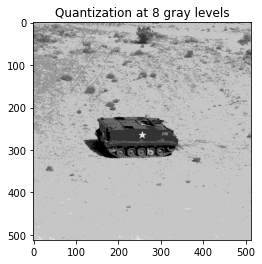

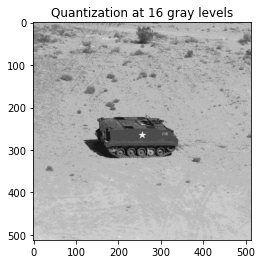

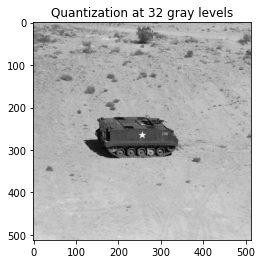

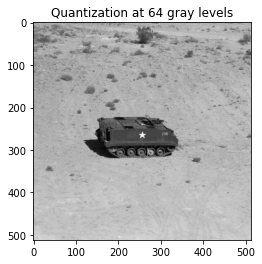

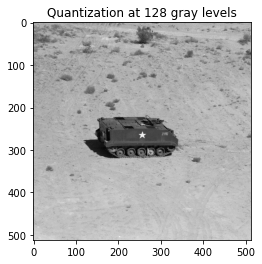

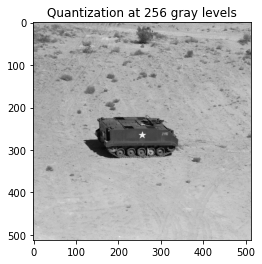

In [9]:
vals=[1,2,3,4,5,6,7,8] # quantization values
for k in vals:
    intensity = 2**k
    compress_fac = 256 / intensity
    mod_img = np.uint8(np.floor(img/compress_fac))
    plt.imshow(mod_img,cmap='Greys_r')
    plt.title('Quantization at {} gray levels'.format(2**k))
    plt.show()


# Question 3:

<b>3.1 Histogram of input image </b>

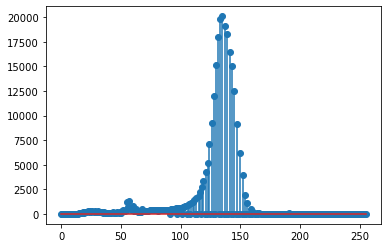

In [10]:
#finding histogram
def histogram(img):
    a = np.zeros((256,))
    h,w = img.shape
    for i in range(w):
        for j in range(h):
            g = int(img[j,i])
            a[g] = a[g]+1
    return a

h = histogram(img)
plt.stem(h)
plt.show()

<b> 3.2 Modal Threhsolding: Compared to last binary image in previous problem this method is giving better results as the object of interest is clearly identifiable</b>


Modality of Histogram: 1


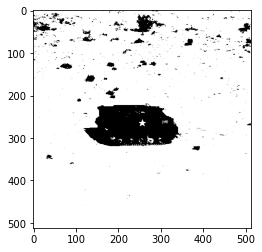

In [11]:
# smoothing the histogram based on N neighbours to find peaks
def smoothing(arr,N):
    for i in range(len(arr)-N+1): 
        arr[i]=np.mean(arr[i:i+N-1])
    return arr

# peak finding in smoothened histogram based on n neighbours comparison
def peak_finder(s,n):
    for j in range(n,len(s)-n+1):
        temp=s[j-n:j+n+1].copy()
        temp[n]=0
        if(s[j]>(temp.max())):
            temp1=(2*j+N)/2
            peak.append(temp1)
    final_t=np.asarray(peak)
    return(np.mean(final_t))

t=[]
peak=[]
N = 5 #neighbourhood for averaging the histogram
n= 7 #neighbourhood for comparison of histogram values in peak finder

smooth=smoothing(h,N)
modal=peak_finder(smooth,n)

print('Modality of Histogram: {}'.format((modal.size)))
threshold=np.mean(modal)
img = 1.0 * (img > threshold)
plt.imshow(img,cmap='Greys_r')
plt.show()

<b> 3.3 Connected Components </b>

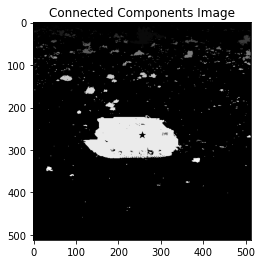

In [12]:
def connected_components(img,r):

    k=1 #label
    h,w = img.shape
    for i in range(1,h-1):
        for j in range(1,w-1):
            north = img[i][j-1]
            west = img[i-1][j]
            curr_pos = img[i][j]

            if curr_pos==0 and north==1 and west==1:
                r[i][j]=k
                k=k+1
                continue

            elif curr_pos==0 and north==1 and west==0:
                r[i][j]=r[i-1][j]
                continue

            elif curr_pos==0 and north==0 and west==1:
                r[i][j]=r[i][j-1]
                continue

            elif curr_pos==0 and north==0 and west==0:
                r[i][j]=np.minimum(r[i][j-1],r[i-1][j])
                if r[i][j-1] != r[i-1][j]:
                    t = np.maximum(r[i][j-1], r[i-1][j])
                    for m in range(h):
                        for n in range(w):
                            if (r[m][n] == t):
                                r[m][n]=r[i][j]
    return r,k

reg = np.zeros(img.shape,img.dtype) #region
h1,w1 = reg.shape
for i in range(h1):
    reg[0][i]=1
for j in range(w1):
    reg[j][0]=1
    
r,k = connected_components(img,reg)
plt.imshow(r, cmap='Greys_r')
plt.title('Connected Components Image')
plt.show()


<b> 3.4 Blob Removal </b>

MINOR BLOB REMOVAL
Step 1


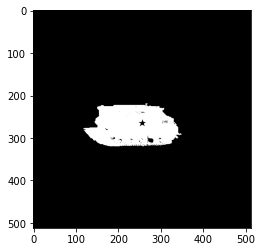

Step 2


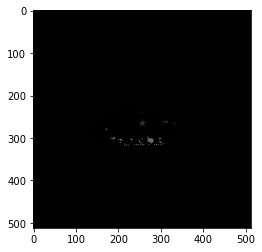

Step 3


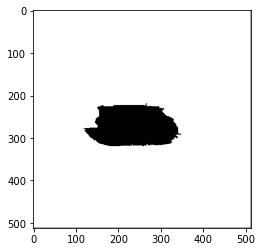

In [13]:
print('MINOR BLOB REMOVAL')

##############  STEP 1 ############################
a = np.zeros((k,))
h,w = r.shape
for i in range(h):
    for j in range(w):
        g = int(r[i][j])
        a[g] = a[g]+1
a[0]=0  
max_blob = np.argmax(np.asarray(a))

x=1
if x==1:
    y=1
    b = np.zeros(r.shape)
else:
    y=0
    b = np.ones(r.shape)
for i in range(h):
    for j in range(w):
        if max_blob==r[i][j]:
            b[i][j] = y 

print('Step 1')
plt.imshow(b,cmap='Greys_r')
plt.show()

######################  STEP 2 ###############################
print('Step 2')
reg= np.zeros(b.shape,b.dtype)
h1,w1 = reg.shape
for i in range(h1):
    reg[0][i]=1
for j in range(w1):
    reg[j][0]=1
r, k1 = connected_components(b,reg)
plt.imshow(r, cmap='Greys_r')
plt.show()

########################  STEP 3 ############################### 
a = np.zeros((k1,))
h,w = r.shape
for i in range(h):
    for j in range(w):
        g = int(r[i][j])
        a[g] = a[g]+1
a[0]=0  
max_blob = np.argmax(np.asarray(a))

x=1
if x==1:
    y=1
    b = np.zeros(r.shape)
else:
    y=0
    b = np.ones(r.shape)
for i in range(h):
    for j in range(w):
        if max_blob==r[i][j]:
            b[i][j] = y 
print('Step 3')
plt.imshow(b,cmap='Greys_r')
plt.show()


<b>3.5 MEDIAN, ERODE and DILATE Transformation, Change the window size as per requirement </b>

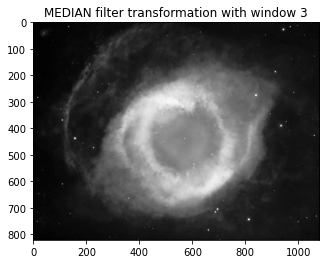

In [ ]:
def median_filter(image, window_size):
    new_image = np.zeros(image.shape, image.dtype)
    new_h, new_w= new_image.shape
    template = []

    for x in range(int(window_size/2), new_w - int(window_size/2)):
        a = x + int((window_size-1)/2)
        for y in range(int(window_size/2), new_h - int(window_size/2)):
            b = y + int((window_size-1)/2)
            for c in range(window_size):
                for d in range(window_size):
                    template.append(image[b - d, a - c])
            template.sort()
            new_image[y, x] = template[int((int((window_size**2)) - 1) / 2)]
            template = []
    return new_image


def erosion(image, window_size, template):
    new_image = np.zeros(image.shape, image.dtype)
    new_h, new_w= new_image.shape

    for x in range(int(window_size/2), new_w - int(window_size/2)):
        for y in range(int(window_size/2), new_h - int(window_size/2)):
            minimum = 255
            for c in range(window_size):
                for d in range(window_size):
                    a = x - int((window_size-1)/2) - 1 + c
                    b = y - int((window_size-1)/2) - 1 + d
                    sub = image[b, a] - template[d, c]
                    if sub < minimum:
                        if sub > 0:
                            minimum = sub
            new_image[y, x] = int(minimum)
    return new_image


def dilation(image, window_size, template):
    new_image = np.zeros(image.shape, image.dtype)
    new_h, new_w= new_image.shape

    for x in range(int(window_size/2), new_w - int(window_size/2)):
        for y in range(int(window_size/2), new_h - int(window_size/2)):
            maximum = 0
            for c in range(window_size):
                for d in range(window_size):
                    a = x - int((window_size - 1) / 2) - 1 + c
                    b = y - int((window_size - 1) / 2) - 1 + d
                    sub = image[b, a] - template[d, c]
                    if sub > maximum:
                        if sub > 0:
                            maximum = sub
            new_image[y, x] = int(maximum)
    return new_image

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img_ori = plt.imread('helix_blancoHubble_1080.jpg')
img = rgb2gray(img_ori).astype(int)
inv = np.invert(img)

#Change window size here
# window = 5
# temp = np.zeros(img.shape, img.dtype)
def square(n):
    window = np.ones([n,n])
    return window

def cross(n):
    mid = int((n-1)/2)
    window = np.zeros([n,n])
    h,w = window.shape
    for i in range(h):
        window[i][mid] = 1
        window[mid][i] = 1
    return window


#Change window size here
window = 3
temp = square(window)
# Median Filter

new_img = median_filter(img, window)
plt.imshow(new_img, cmap='Greys_r')
plt.title('MEDIAN filter transformation with window {}'.format(window))
plt.show()


# Erosion

new_img = erosion(inv, window, temp)
plt.imshow(new_img, cmap='Greys_r')
plt.title('EROSION filter transformation with window {}'.format(window))
plt.show()

# Dilation

new_img = dilation(inv, window, temp)
plt.imshow(new_img, cmap='Greys_r')
plt.title('DILATION filter transformation with window {}'.format(window))
plt.show()


<b>3.6 OPEN and CLOSE Transformation</b>

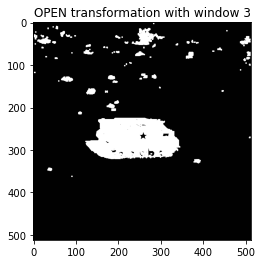

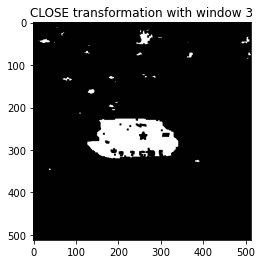

In [12]:
def open_op(image, window_size, template):
    new_image = erosion(image, window_size, template)
    new_image_2 = dilation(new_image, window_size, template)
    return new_image_2


def close_op(image, window_size, template):
    new_image = dilation(image, window_size, template)
    new_image_2 = erosion(new_image, window_size, template)
    return new_image_2

window = 3

# Opening

temp = np.zeros(img.shape, img.dtype)
new_img = open_op(img, window, temp)
plt.imshow(new_img, cmap='Greys_r')
plt.title('OPEN transformation with window {}'.format(window))
plt.show()

# Closing

temp = np.zeros(img.shape, img.dtype)
new_img = close_op(img, window, temp)
plt.imshow(new_img, cmap='Greys_r')
plt.title('CLOSE transformation with window {}'.format(window))
plt.show()

<b>3.7 OPEN-CLOS and CLOS-OPEN</b>

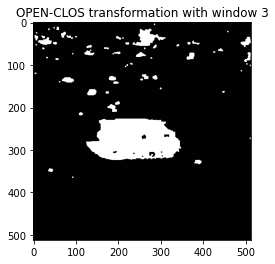

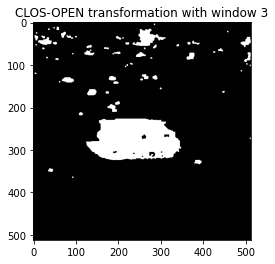

In [13]:
window = 3

# OPEN-CLOS

temp = np.zeros(img.shape, img.dtype)
new_img = open_op(img, window, temp)
new_img = close_op(new_img, window, temp)
plt.imshow(new_img, cmap='Greys_r')
plt.title('OPEN-CLOS transformation with window {}'.format(window))
plt.show()

# CLOS-OPEN

temp = np.zeros(img.shape, img.dtype)
new_img = open_op(img, window, temp)
new_img = close_op(new_img, window, temp)
plt.imshow(new_img, cmap='Greys_r')
plt.title('CLOS-OPEN transformation with window {}'.format(window))
plt.show()



<b> 3.8 Number of pixels in object of interest i.e. APC </b>

In [14]:
print('Number of pixels: {}'.format(np.sum(b==0))) #no of white pixels

Number of pixels: 18072
